In [2]:
from levy_1d import *
import matplotlib.pyplot as plt

In this notebook we give examples utilizing `levy_1d.py` to produce Levy flight maps and study their statistics.

### 1 Rayleigh-Levy flight maps and statistics

The input to Levy flight maps are the box width, pixel size (we fix this this to 1), smoothing kernel, the number of steps, and the flight parameters ($\alpha$ and $l_0$).

The function `get_levy_flight_1d` generates a map provided these inputs. The results are shown below through histograms; note that the binning is for visualization purposes only and is not relevant to the statistics.

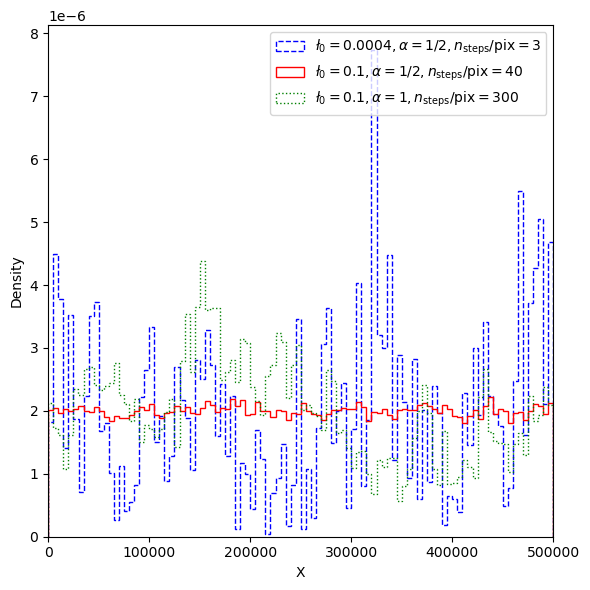

In [3]:
box_width=500000
grid_size = box_width; pixel_size = box_width/grid_size

fig,ax=plt.subplots(figsize=(6,6))
# bp2024
l_0=0.0004; alpha_0=1/2; n_steps = 3*int(box_width/pixel_size)
x = get_levy_flight_1d(n_steps, t_0=l_0, alpha=alpha_0, box_size=box_width, periodic=True)
ax.hist(x,bins=100, histtype='step', density=True, ls='--', lw=1, color='blue', \
        label=r'$\l_0=0.0004, \alpha=1/2, n_{\rm steps}/{\rm pix}=3$');

# near-gaussian
l_0=0.1; alpha_0=1/2; n_steps = 40*int(box_width/pixel_size)
x = get_levy_flight_1d(n_steps, t_0=l_0, alpha=alpha_0, box_size=box_width, periodic=True)
ax.hist(x,bins=100, histtype='step', density=True, ls='-', lw=1, color='red', \
        label=r'$\l_0=0.1, \alpha=1/2, n_{\rm steps}/{\rm pix}=40$');

# alpha=1
l_0=0.1; alpha_0=1; n_steps = 300*int(box_width/pixel_size)
x = get_levy_flight_1d(n_steps, t_0=l_0, alpha=alpha_0, box_size=box_width, periodic=True)
ax.hist(x,bins=100, histtype='step', density=True, ls=':', lw=1, color='green', \
        label=r'$\l_0=0.1, \alpha=1, n_{\rm steps}/{\rm pix}=300$');

# ax.set_yscale('log')
ax.set_xlim(0, box_width)
ax.set_ylabel('Density'); ax.set_xlabel('X'); ax.legend(loc='upper right')
fig.tight_layout()
# fig.savefig('figs/levy_1d_examples.pdf')
plt.show()

To study the flight statistics, we can use the function `run_levy_1d`. This has the similar inputs as the previous function and returns the binned densities (after Gaussian smoothing) and PDF, as well as the local variance $\xi_0$ and the one-point skewness ${\cal S}_3$. An example is shown below that uses this function.

In [6]:
l_0 = 0.0004; alpha_0 = 1/2
bins_rho_density, pdf_rho_density, xi_0, s3=\
run_levy_1d(l_0=l_0, alpha_0=alpha_0, n_steps_per_pixel=3, box_width=100000, \
            smoothing_scale_per_pix=4, n_bins_density=100, return_rho_1d=False)
print('local variance xi_0 = ', xi_0); print('local skewness s3 = ', s3)

local variance xi_0 =  11.16518754840341
local skewness s3 =  1.5412475094774134


The results of `run_levy_1d` can be easily compared with mean field and beyond mean field expectation values; there are also built-in functions for both. We prepare these expectation values in the following.

In [7]:
# bin centers
bin_centers_rho_density = (bins_rho_density[:-1] + bins_rho_density[1:]) / 2

# mean field, and beyond mean field with 7th order terms in r-CGF
pdf_density_mf = PDF_rho_mf(bin_centers_rho_density, xi_0)
pdf_density_bmf = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_7(x), \
                                       rhos=bin_centers_rho_density, xi_0=xi_0)

The PDFs and differences with respect to mean field results are shonw below.

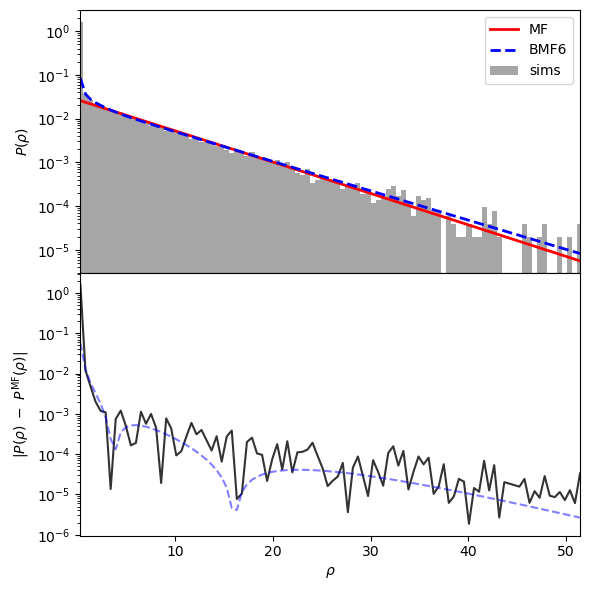

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(6,6), sharex=True)
ax[0].bar(bin_centers_rho_density, pdf_rho_density, width=np.diff(bins_rho_density), \
          align='center', color='gray', edgecolor='none', alpha=0.7, label='sims')
ax[0].plot(bin_centers_rho_density, pdf_density_mf, 'r-', lw=2, label='MF')
ax[0].plot(bin_centers_rho_density, pdf_density_bmf, 'b--', lw=2, label='BMF6')
ax[0].set_ylabel(r'$P(\rho)$'); ax[0].set_yscale('log'); ax[0].legend(loc='upper right')

ax[1].plot(bin_centers_rho_density, np.abs(pdf_rho_density-pdf_density_mf), \
           'k-', alpha=0.8, label='sims')
ax[1].plot(bin_centers_rho_density, np.abs(pdf_density_bmf-pdf_density_mf), \
           'b--', alpha=0.5, label='BMF6')
ax[1].set_ylabel(r'$| P(\rho) \ - \ P^{\rm MF}(\rho) |$'); ax[1].set_xlabel(r'$\rho$')
ax[1].set_xlim(min(bin_centers_rho_density), max(bin_centers_rho_density))
ax[1].set_yscale('log')

fig.tight_layout(); fig.subplots_adjust(hspace=0.00)
plt.show()

Note that these are for a single realization.

### 2 Multiple realisations

The statistics of a field must be examined through multiple realisations. In this section we introduce the function `run_levys_1d` which produces multiple Levy flight maps and computes their statistics over multiple realisations. We give the results for several Levy flight parameter choices, a non Gaussian one and near Gaussian one.

#### 2-0 B&P2024/arXiv:2402.15915

We start with a very non-Gaussian case as in https://arxiv.org/abs/2402.15915.

Below we show how to use `run_levys_1d` to compute Levy flight statistics over multiple realisations.

In [9]:
l_0 = 0.0004; alpha_0 = 1/2
n_steps_per_pixel=3; box_width=500000
smoothing_scale_per_pix=4; n_bins_density=300; num_sims = 500
all_pdf_rho, all_bin_centers_rho, all_xi_0, all_s3, all_pdf_rho_minus_mf, all_pdf_rho_over_mf = \
run_levys_1d(l_0 = l_0, alpha_0 = alpha_0, n_steps_per_pixel = n_steps_per_pixel, \
             box_width = box_width, smoothing_scale_per_pix=smoothing_scale_per_pix, \
             n_bins_density=n_bins_density, num_sims = num_sims)

# local statistics across realisations
print('local variance xi_0 = ', np.mean(all_xi_0), '+/-', np.std(all_xi_0)/np.sqrt(num_sims))
print('local skewness s3   = ', np.mean(all_s3), '+/-', np.std(all_s3)/np.sqrt(num_sims))

Simulations: 100%|███████████████████████████████████████████| 500/500 [00:06<00:00, 75.90it/s]


local variance xi_0 =  11.431911324710324 +/- 0.008415944441349354
local skewness s3   =  1.5596912688566813 +/- 0.001274041165921235


Below we summarize the PDFs over multiple realisations by computing the means and standard errors. We also give the mean field and beyond mean field theoretical predictions at various orders.

In [ ]:
pdf_rho_ave=np.mean(all_pdf_rho, axis=0);
pdf_rho_std=np.std(all_pdf_rho, axis=0)

bin_centers_rho_ave=np.mean(all_bin_centers_rho, axis=0)
bin_centers_rho_std=np.std(all_bin_centers_rho, axis=0)

pdf_rho_minus_mf_ave=np.mean(all_pdf_rho_minus_mf, axis=0)
pdf_rho_minus_mf_std=np.std(all_pdf_rho_minus_mf, axis=0)

pdf_rho_over_mf_ave=np.mean(all_pdf_rho_over_mf, axis=0)
pdf_rho_over_mf_std=np.std(all_pdf_rho_over_mf, axis=0)

# # mean field and beyond mean field at mean values
pdf_rho_mf=PDF_rho_mf(bin_centers_rho_ave, np.mean(all_xi_0))
pdf_rho_bmf_3 = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_3(x), \
                                     rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0))
pdf_rho_bmf_5 = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_5(x), \
                                     rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0))
pdf_rho_bmf_7 = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_7(x), \
                                     rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0))

The results are shown in the following.

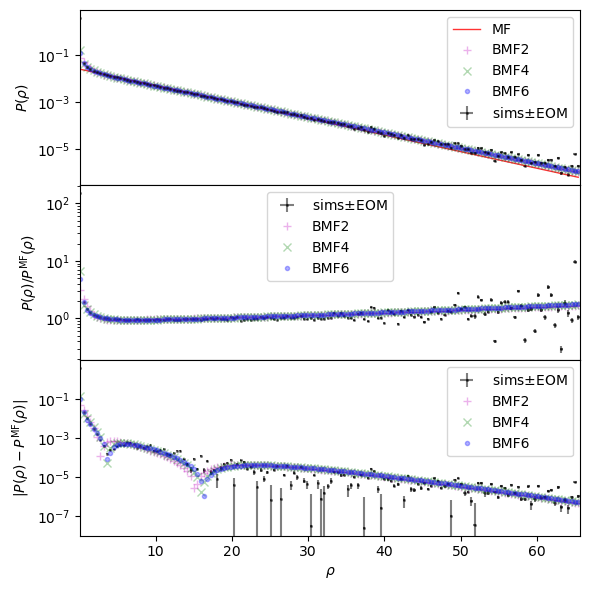

In [11]:
bin_intervals=2
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               xerr=bin_centers_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               y=pdf_rho_ave[::bin_intervals], \
               yerr=pdf_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               fmt='ks', markersize=1, alpha=0.5, label=r'sims$\pm$EOM')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_mf[::bin_intervals], 'r-', lw=1, alpha=0.8, label='MF')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_3[::bin_intervals], 'm+', lw=1, alpha=0.3, label='BMF2')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_5[::bin_intervals], 'gx', lw=1, alpha=0.3, label='BMF4')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_7[::bin_intervals], 'b.', lw=1, alpha=0.3, label='BMF6')
ax[0].set_yscale('log'); ax[0].legend(loc='upper right')
ax[0].set_ylabel(r'$P(\rho)$');

ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               xerr=bin_centers_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               y=pdf_rho_over_mf_ave[::bin_intervals], \
               yerr=pdf_rho_over_mf_std[::bin_intervals]/np.sqrt(num_sims), \
               fmt='ks', markersize=1, alpha=0.5, label=r'sims$\pm$EOM')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_3[::bin_intervals]/pdf_rho_mf[::bin_intervals], \
               fmt='m+', alpha=0.3, label=r'BMF2')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_5[::bin_intervals]/pdf_rho_mf[::bin_intervals], \
               fmt='gx', alpha=0.3, label=r'BMF4')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_7[::bin_intervals]/pdf_rho_mf[::bin_intervals], \
               fmt='b.', alpha=0.3, label=r'BMF6')
ax[1].set_yscale('log'); ax[1].legend(loc='upper center')
ax[1].set_ylabel(r'$P(\rho)/P^{\rm MF}(\rho)$');

ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               xerr=bin_centers_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               y=np.abs(pdf_rho_minus_mf_ave[::bin_intervals]), \
               yerr=pdf_rho_minus_mf_std[::bin_intervals]/np.sqrt(num_sims), \
               fmt='ks', markersize=1, alpha=0.5, label=r'sims$\pm$EOM')
ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=np.abs(pdf_rho_bmf_3[::bin_intervals]-pdf_rho_mf[::bin_intervals]), \
               fmt='m+', alpha=0.3, label=r'BMF2')
ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=np.abs(pdf_rho_bmf_5[::bin_intervals]-pdf_rho_mf[::bin_intervals]), \
               fmt='gx', alpha=0.3, label=r'BMF4')
ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=np.abs(pdf_rho_bmf_7[::bin_intervals]-pdf_rho_mf[::bin_intervals]), \
               fmt='b.', alpha=0.3, label=r'BMF6')
ax[2].set_ylabel(r'$|P(\rho) - P^{\rm MF}(\rho)|$'); ax[2].set_xlabel(r'$\rho$')
ax[2].legend(loc='upper right'); ax[2].set_yscale('log');

ax[2].set_xlim(min(bin_centers_rho_ave), max(bin_centers_rho_ave))
fig.tight_layout(); fig.subplots_adjust(hspace=0.00)
# fig.savefig('figs/pdf_rho_1d_gaussian_bp24params.pdf')
plt.show()

#### 2-1 Near Gaussian

Here we present realisations of Levy flights that is near Gaussian (visually speaking).

In [12]:
l_0 = 0.1; alpha_0 = 1/2
n_steps_per_pixel=40; box_width=500000;
smoothing_scale_per_pix=4; n_bins_density=300; num_sims = 500
all_pdf_rho, all_bin_centers_rho, all_xi_0, all_s3, all_pdf_rho_minus_mf, all_pdf_rho_over_mf = \
run_levys_1d(l_0 = l_0, alpha_0 = alpha_0, n_steps_per_pixel = n_steps_per_pixel, \
             box_width = box_width, smoothing_scale_per_pix=smoothing_scale_per_pix, \
             n_bins_density=n_bins_density, num_sims = num_sims)
print('local variance xi_0 = ', np.mean(all_xi_0), '+/-', np.std(all_xi_0)/np.sqrt(num_sims))
print('local skewness s3   = ', np.mean(all_s3), '+/-', np.std(all_s3)/np.sqrt(num_sims))

Simulations: 100%|███████████████████████████████████████████| 500/500 [01:18<00:00,  6.34it/s]

local variance xi_0 =  0.05223044733435857 +/- 2.548720133397291e-05
local skewness s3   =  1.549635609176049 +/- 0.0019240353170086719


The averaging of PDFs over multiple realisations are carried below, as well as the computation of the beyond mean field expectation values at the mean local variance.

In [13]:
pdf_rho_ave=np.mean(all_pdf_rho, axis=0)
pdf_rho_std=np.std(all_pdf_rho, axis=0)

bin_centers_rho_ave=np.mean(all_bin_centers_rho, axis=0)
bin_centers_rho_std=np.std(all_bin_centers_rho, axis=0)

pdf_rho_minus_mf_ave=np.mean(all_pdf_rho_minus_mf, axis=0)
pdf_rho_minus_mf_std=np.std(all_pdf_rho_minus_mf, axis=0)

pdf_rho_over_mf_ave=np.mean(all_pdf_rho_over_mf, axis=0)
pdf_rho_over_mf_std=np.std(all_pdf_rho_over_mf, axis=0)

# # mean field and beyond mean field at mean values
pdf_rho_mf=PDF_rho_mf(bin_centers_rho_ave, np.mean(all_xi_0))
pdf_rho_bmf_3 = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_3(x), \
                                     rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0))
pdf_rho_bmf_5 = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_5(x), \
                                     rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0))
pdf_rho_bmf_7 = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf_7(x), \
                                     rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0))

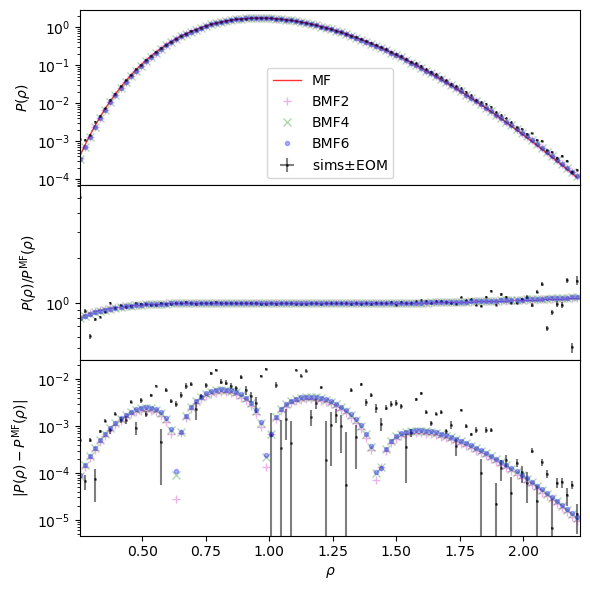

In [14]:
bin_intervals=3
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               xerr=bin_centers_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               y=pdf_rho_ave[::bin_intervals], \
               yerr=pdf_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               fmt='ks', markersize=1, alpha=0.5, label=r'sims$\pm$EOM')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_mf[::bin_intervals], 'r-', lw=1, alpha=0.8, label='MF')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_3[::bin_intervals], 'm+', lw=1, alpha=0.3, label='BMF2')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_5[::bin_intervals], 'gx', lw=1, alpha=0.3, label='BMF4')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_7[::bin_intervals], 'b.', lw=1, alpha=0.3, label='BMF6')
ax[0].set_yscale('log'); ax[0].legend(loc='lower center')
ax[0].set_ylabel(r'$P(\rho)$');

ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               xerr=bin_centers_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               y=pdf_rho_over_mf_ave[::bin_intervals], \
               yerr=pdf_rho_over_mf_std[::bin_intervals]/np.sqrt(num_sims), \
               fmt='ks', markersize=1, alpha=0.5, label=r'sims$\pm$EOM')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_3[::bin_intervals]/pdf_rho_mf[::bin_intervals], \
               fmt='m+', alpha=0.3, label=r'BMF2')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_5[::bin_intervals]/pdf_rho_mf[::bin_intervals], \
               fmt='gx', alpha=0.3, label=r'BMF4')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_7[::bin_intervals]/pdf_rho_mf[::bin_intervals], \
               fmt='b.', alpha=0.3, label=r'BMF6')
ax[1].set_ylabel(r'$P(\rho)/P^{\rm MF}(\rho)$'); ax[1].set_yscale('log');

ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               xerr=bin_centers_rho_std[::bin_intervals]/np.sqrt(num_sims), \
               y=np.abs(pdf_rho_minus_mf_ave[::bin_intervals]), \
               yerr=pdf_rho_minus_mf_std[::bin_intervals]/np.sqrt(num_sims), \
               fmt='ks', markersize=1, alpha=0.5, label=r'sims$\pm$EOM')
ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=np.abs(pdf_rho_bmf_3[::bin_intervals]-pdf_rho_mf[::bin_intervals]), \
               fmt='m+', alpha=0.3, label=r'BMF2')
ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=np.abs(pdf_rho_bmf_5[::bin_intervals]-pdf_rho_mf[::bin_intervals]), \
               fmt='gx', alpha=0.3, label=r'BMF4')
ax[2].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=np.abs(pdf_rho_bmf_7[::bin_intervals]-pdf_rho_mf[::bin_intervals]), \
               fmt='b.', alpha=0.3, label=r'BMF6')
ax[2].set_ylabel(r'$|P(\rho) - P^{\rm MF}(\rho)|$');
ax[2].set_xlabel(r'$\rho$'); ax[2].set_yscale('log');

ax[2].set_xlim(min(bin_centers_rho_ave), max(bin_centers_rho_ave))
fig.tight_layout(); fig.subplots_adjust(hspace=0.00)
# fig.savefig('figs/pdf_rho_1d_gaussian_neargaussian.pdf')
plt.show()

### 3 Box systematics

In practice depending on the rarity of long jumps, the size of the box in Levy flight simulations can play a substantial role in the statistics. We examine this in the following using another function `compute_s3_systematics` that computes the skewness over multiple realisations for different box sizes; see `run_my_levy_1d.py` for example, run in terminal as `python run_my_levy_1d.py`. The function saves the results as a pickle in a directory `./data`.

We examine the results, first for the non-Gaussian example by loading the pickle files in the usual way.

Loaded S3 systematics at ./data/s3_1d_box_systematics_bp24params.pkl with input
{'l_0': 0.0004, 'alpha_0': 0.5, 'n_steps_per_pixel': 3, 'smoothing_scale_per_pix': 4, 'n_bins_density': 300, 'num_sims': 500}



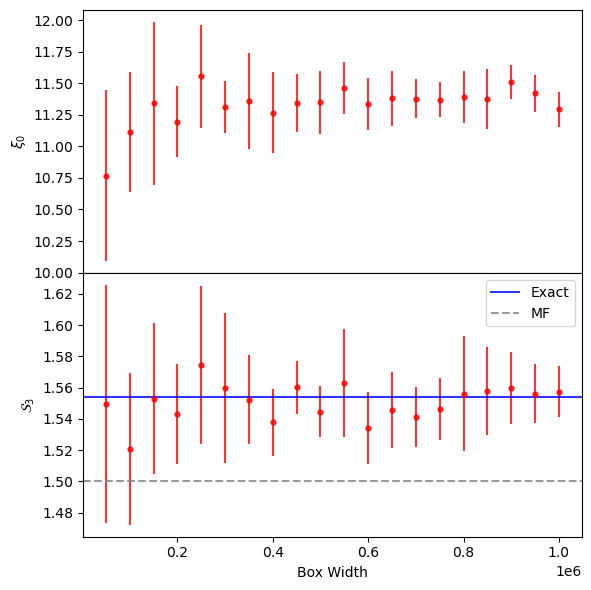

In [15]:
fname='s3_1d_box_systematics_bp24params'
dir='./data'
filepath = os.path.join(dir, fname + '.pkl')
with open(filepath, 'rb') as f:
    s3_systematics = pickle.load(f)
print(f'Loaded S3 systematics at {filepath} with input')
print(s3_systematics['input'])
print()

s3_box_systematics=s3_systematics['s3_box_systematics']
box_widths=s3_box_systematics[:, 0]
fig, ax=plt.subplots(nrows=2, sharex=True, figsize=(6,6))
for idx in range(len(box_widths)):
    box_width=box_widths[idx]
    ax[0].errorbar(box_width, s3_box_systematics[:, 1][idx], yerr=s3_box_systematics[:, 2][idx], \
                   fmt='r.', alpha=0.8, markersize=7)
    ax[1].errorbar(box_width,s3_box_systematics[:, 3][idx], yerr=s3_box_systematics[:, 4][idx], \
                   fmt='r.', alpha=0.8, markersize=7)
ax[1].axhline(s3_exact(alpha=s3_systematics['input']['alpha_0']), color='blue', alpha=0.8, label='Exact')
ax[1].axhline(1.5, linestyle='--', color='gray', alpha=0.8, label='MF')
ax[0].set_ylabel(r'$\xi_0$'); ax[1].set_ylabel(r'${\cal S}_3$')
ax[1].set_xlabel('Box Width'); ax[1].legend(loc='upper right')
fig.tight_layout(); fig.subplots_adjust(hspace=0)
# fig.savefig(f'figs/{fname}.pdf')
plt.show()

This supports the stability of the numerical simulations over a wide range of box sizes (in 1D). The similar plot of the local variance and skewnewss for the near Gaussian case is presented below.

Loaded S3 systematics at ./data/s3_1d_box_systematics_neargaussian.pkl with input
{'l_0': 0.1, 'alpha_0': 0.5, 'n_steps_per_pixel': 40, 'smoothing_scale_per_pix': 4, 'n_bins_density': 300, 'num_sims': 500}



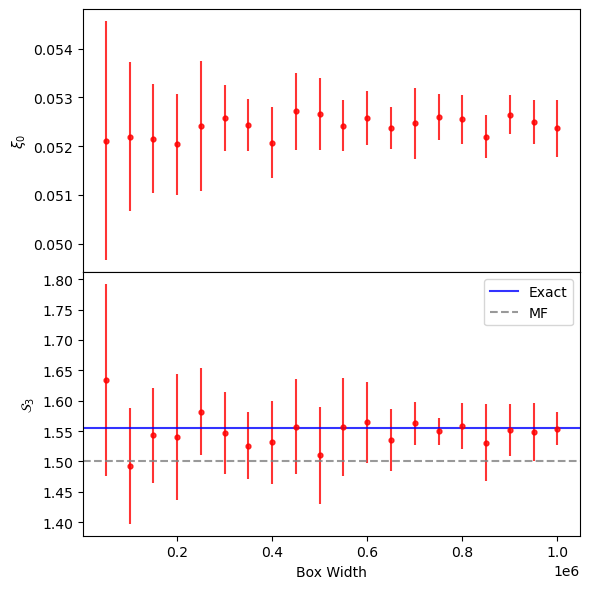

In [16]:
fname='s3_1d_box_systematics_neargaussian'
dir='./data'
filepath = os.path.join(dir, fname + '.pkl')
with open(filepath, 'rb') as f:
    s3_systematics = pickle.load(f)
print(f'Loaded S3 systematics at {filepath} with input')
print(s3_systematics['input'])
print()

s3_box_systematics=s3_systematics['s3_box_systematics']
box_widths=s3_box_systematics[:, 0]
fig, ax=plt.subplots(nrows=2, sharex=True, figsize=(6,6))
for idx in range(len(box_widths)):
    box_width=box_widths[idx]
    ax[0].errorbar(box_width, s3_box_systematics[:, 1][idx], yerr=s3_box_systematics[:, 2][idx], \
                   fmt='r.', alpha=0.8, markersize=7)
    ax[1].errorbar(box_width,s3_box_systematics[:, 3][idx], yerr=s3_box_systematics[:, 4][idx], \
                   fmt='r.', alpha=0.8, markersize=7)
ax[1].axhline(s3_exact(alpha=s3_systematics['input']['alpha_0']), color='blue', alpha=0.8, label='Exact')
ax[1].axhline(1.5, linestyle='--', color='gray', alpha=0.8, label='MF')
ax[0].set_ylabel(r'$\xi_0$'); ax[1].set_ylabel(r'${\cal S}_3$')
ax[1].set_xlabel('Box Width'); ax[1].legend(loc='upper right')
fig.tight_layout(); fig.subplots_adjust(hspace=0)
# fig.savefig(f'figs/{fname}.pdf')
plt.show()

### End of notebook